# Generation of the data

In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
import pickle

from FDApy.representation.simulation import KarhunenLoeve, make_coef
from FDApy.representation.functional_data import DenseFunctionalData
from FDApy.visualization.plot import plot

COLORS = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

In [2]:
# Define parameters of the simulation
N = 300
n_features = 3
n_clusters = 2
centers = np.array([[0, 0], [0, 0], [0, 0]])
cluster_std = np.array([[4, 1], [2.66, 0.66], [1.33, 0.33]])

In [3]:
# Define mean functions
mean_function_1 = lambda x: 20 / (1 + np.exp(-x))
mean_function_2 = lambda x: -25 / (1 + np.exp(-x))

In [60]:
coefs, labels = make_coef(n_obs=N, n_features=3, centers=centers, cluster_std=cluster_std)

In [62]:
A = np.array([np.random.laplace(0, 2 * np.sqrt(2), size = 150),
              np.random.laplace(0, 4 * np.sqrt(2) / 3, size = 150),
              np.random.laplace(0, 2 * np.sqrt(2) / 3, size = 150)
             ]).T
B = np.array([np.random.laplace(0, 1 / np.sqrt(2), size = 150),
              np.random.laplace(0, np.sqrt(2) / 3, size = 150),
              np.random.laplace(0, 1 / (np.sqrt(2) * 3), size = 150)
             ]).T
new_coefs = np.concatenate([A, B])

In [63]:
# Simulation one scenario
simu = KarhunenLoeve('wiener', n_functions=n_features)
simu.new(n_obs=N, n_clusters=n_clusters, centers=centers, cluster_std=cluster_std)

values = np.matmul(new_coefs, simu.basis.values)

mean_data = np.vstack([mean_function_1(simu.data.argvals['input_dim_0']),
                       mean_function_2(simu.data.argvals['input_dim_0'])])

new_values = np.vstack([values[:int(N/2), :] + mean_data[0, :],
                        values[int(N/2):, :] + mean_data[0, :],
                        values[:int(N/2), :] + mean_data[1, :],
                        values[int(N/2):, :] + mean_data[1, :],
                        values[int(N/2):, :] + mean_data[1, :] - 15 * np.linspace(0, 1, 100)
                       ])

data = DenseFunctionalData(simu.data.argvals, new_values)
labels = np.hstack([simu.labels, simu.labels + 2, np.repeat(4, int(N/2))])

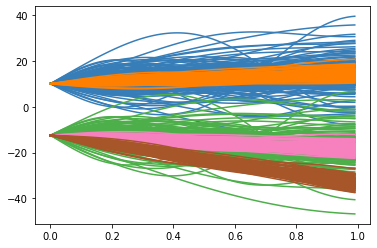

In [64]:
for obs, l in zip(data.values, labels):
    plt.plot(data.argvals['input_dim_0'], obs, c=COLORS[l])

In [65]:
# Save the reduced data
with open('./data/scenario_1_review.pkl', 'wb') as f:
    pickle.dump(data, f)
with open('./data/labels_review.pkl', 'wb') as f:
    pickle.dump(labels, f)

In [9]:
# Save as CSV for R methods
np.savetxt('./data/scenario_1_review.csv', data.values, delimiter=',')
np.savetxt('./data/labels_review.csv', labels, delimiter=',')